In [2]:
# Import Library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [3]:
# Load Dataset
df_ikan = pd.read_csv('fish_data.csv')

In [4]:
# Encoder
label_encoder = LabelEncoder()
df_ikan['species_encoded'] = label_encoder.fit_transform(df_ikan['species'])

In [5]:
# Fitur dan Target
X = df_ikan[['length', 'weight', 'w_l_ratio']].values  # Hanya 3 fitur
y = df_ikan['species_encoded'].values

In [6]:
#Split Dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
# Feature Scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [8]:
# Train Model with Perceptron
classifier = Perceptron(random_state=0, max_iter=10, tol=1e-3)
classifier.fit(x_train, y_train)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Perceptron(max_iter=10)

In [9]:
# Predict Input dari User
input_features = [[21.26, 2.46, 0.9]]  # Panjang, berat, rasio
input_scaled = scaler.transform(input_features)
prediction = classifier.predict(input_scaled)

In [10]:
# Hasil Prediksi
predicted_species = label_encoder.inverse_transform(prediction)
print(f"Species yang diprediksi: {predicted_species[0]}")

Species yang diprediksi: Sillaginopsis panijus


In [11]:
# Evaluasi Model
y_pred = classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.81


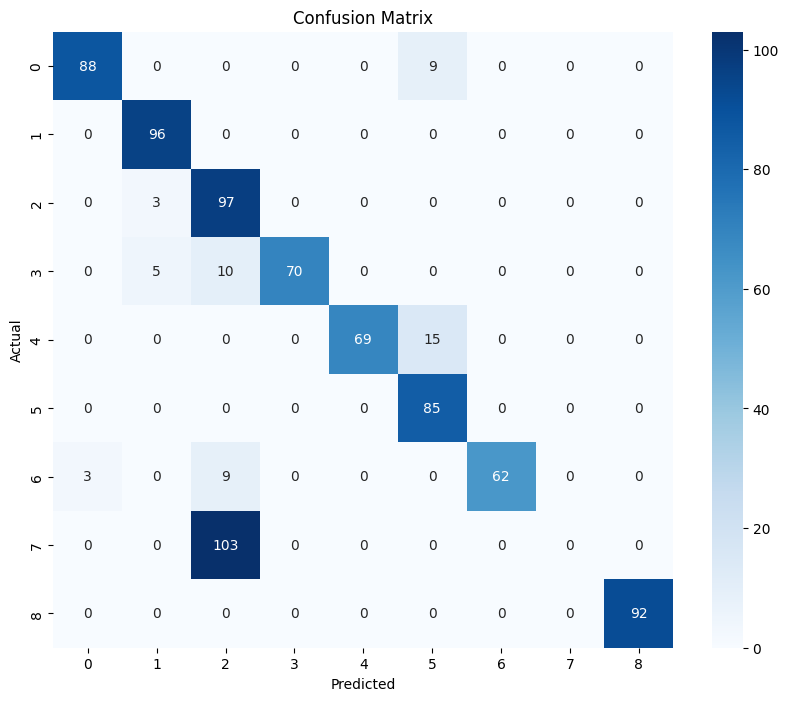

In [12]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [13]:
import joblib

# Simpan model
joblib.dump(classifier, 'perceptron_model.pkl')
# Simpan scaler
joblib.dump(scaler, 'scaler.pkl')
# Simpan Label Encoder
joblib.dump(label_encoder, 'label_encoder.pkl')


['label_encoder.pkl']